In [8]:
import json
import os

import pandas as pd

In [9]:
with open('./export_epita.json') as f:
    data = json.load(f)

In [10]:
def get_docs_from_id(id):
    docs = []
    for o in data:
        if o['document_type_id'] == id:
            docs.append(o)
    return docs

datas = get_docs_from_id(8)
print(len(datas))

289


In [11]:
texts = []
for doc in datas:
    text = ""
    keys = list(doc.keys())
    keys.pop()
    keys.pop()
    for key in keys:
        lines = doc[key]
        for line in lines:
            words = line['line']['words']
            for w in words:
                text += w['text'] + " "
    texts.append(text)
len(texts)

289

In [12]:
import json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

def get_font_size(text, font_path, desired_width):
    min_size, max_size = 7, 40  # reasonable range for fontsize
    while max_size - min_size > 1:
        font_size = (min_size + max_size) // 2
        font = ImageFont.truetype(font_path, font_size)
        if font.getsize(text)[0] > desired_width:
            max_size = font_size
        else:
            min_size = font_size
    return ImageFont.truetype(font_path, min_size)

/tmp/ipykernel_2967/2765491440.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


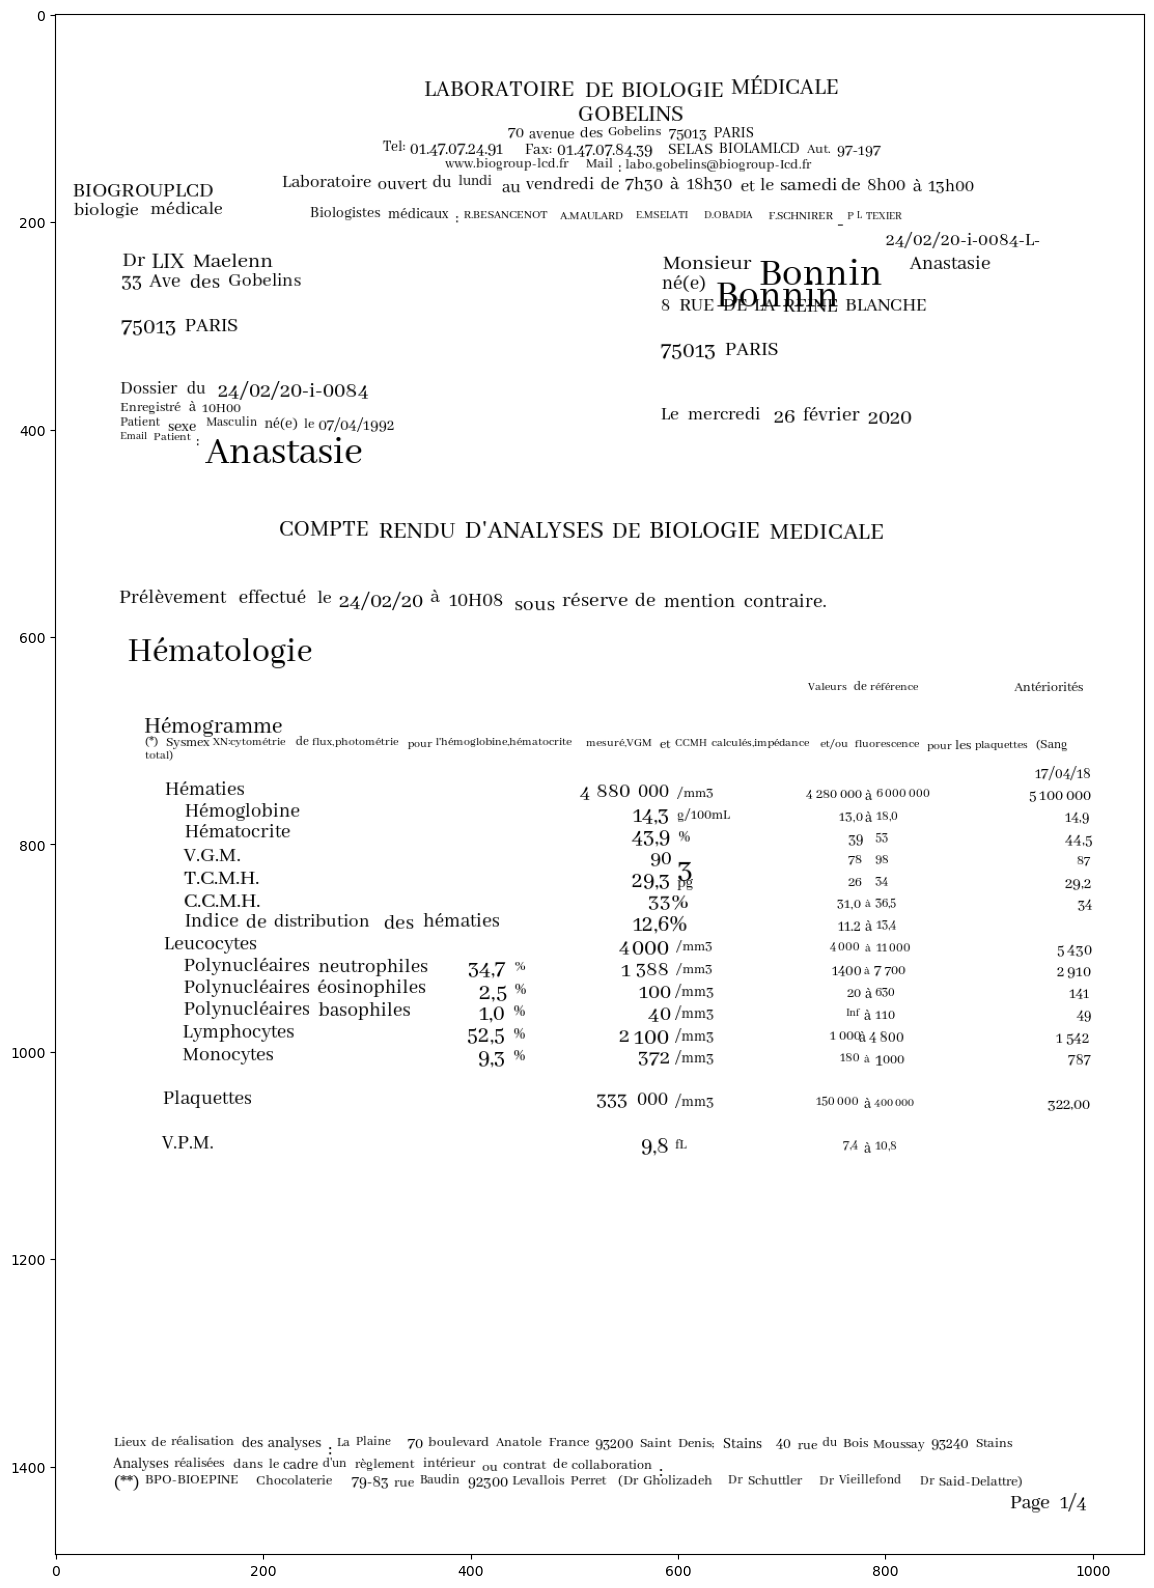

In [13]:
page_0 = datas[3]['0']
width, height = 210 *5, 297*5

####
# put the following code in an other cell to not reload full dataset each time
####
# path of .ttf
font_path = "AbhayaLibre-Regular.ttf"


# create a new image with white background
blank_image = Image.new('RGB', (width, height), 'white')
# get a drawing context
d = ImageDraw.Draw(blank_image)
for line in page_0:
    if line['line']['confidence'] > 50:
        for word in line['line']['words']:
            (x, y, w, h) = (word['left']*width, word['top']*height, word['width']*width, word['height']*height)
            text = word["text"]
            d.text((x, y), text, font=get_font_size(text, font_path, w), fill=(0, 0, 0))

# can locally save the page with following line:
# blank_image.save("output_image.png")
plt.figure(figsize=(40,20))
plt.imshow(blank_image)
plt.savefig('test.png')

In [14]:
from transformers import pipeline

nlp = pipeline('question-answering', model='etalab-ia/camembert-base-squadFR-fquad-piaf', tokenizer='etalab-ia/camembert-base-squadFR-fquad-piaf')

def get_answer(question, context):
    return nlp({
        'question': question,
        'context': context
    })['answer']

question = "Quelle est la valeur Lymphocytes ?"
context = texts[3]

print("Question: ", question)
print("Answer: ", get_answer(question, context))

Question:  Quelle est la valeur Lymphocytes ?
Answer:   52,5 %


/tmp/ipykernel_2967/2765491440.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


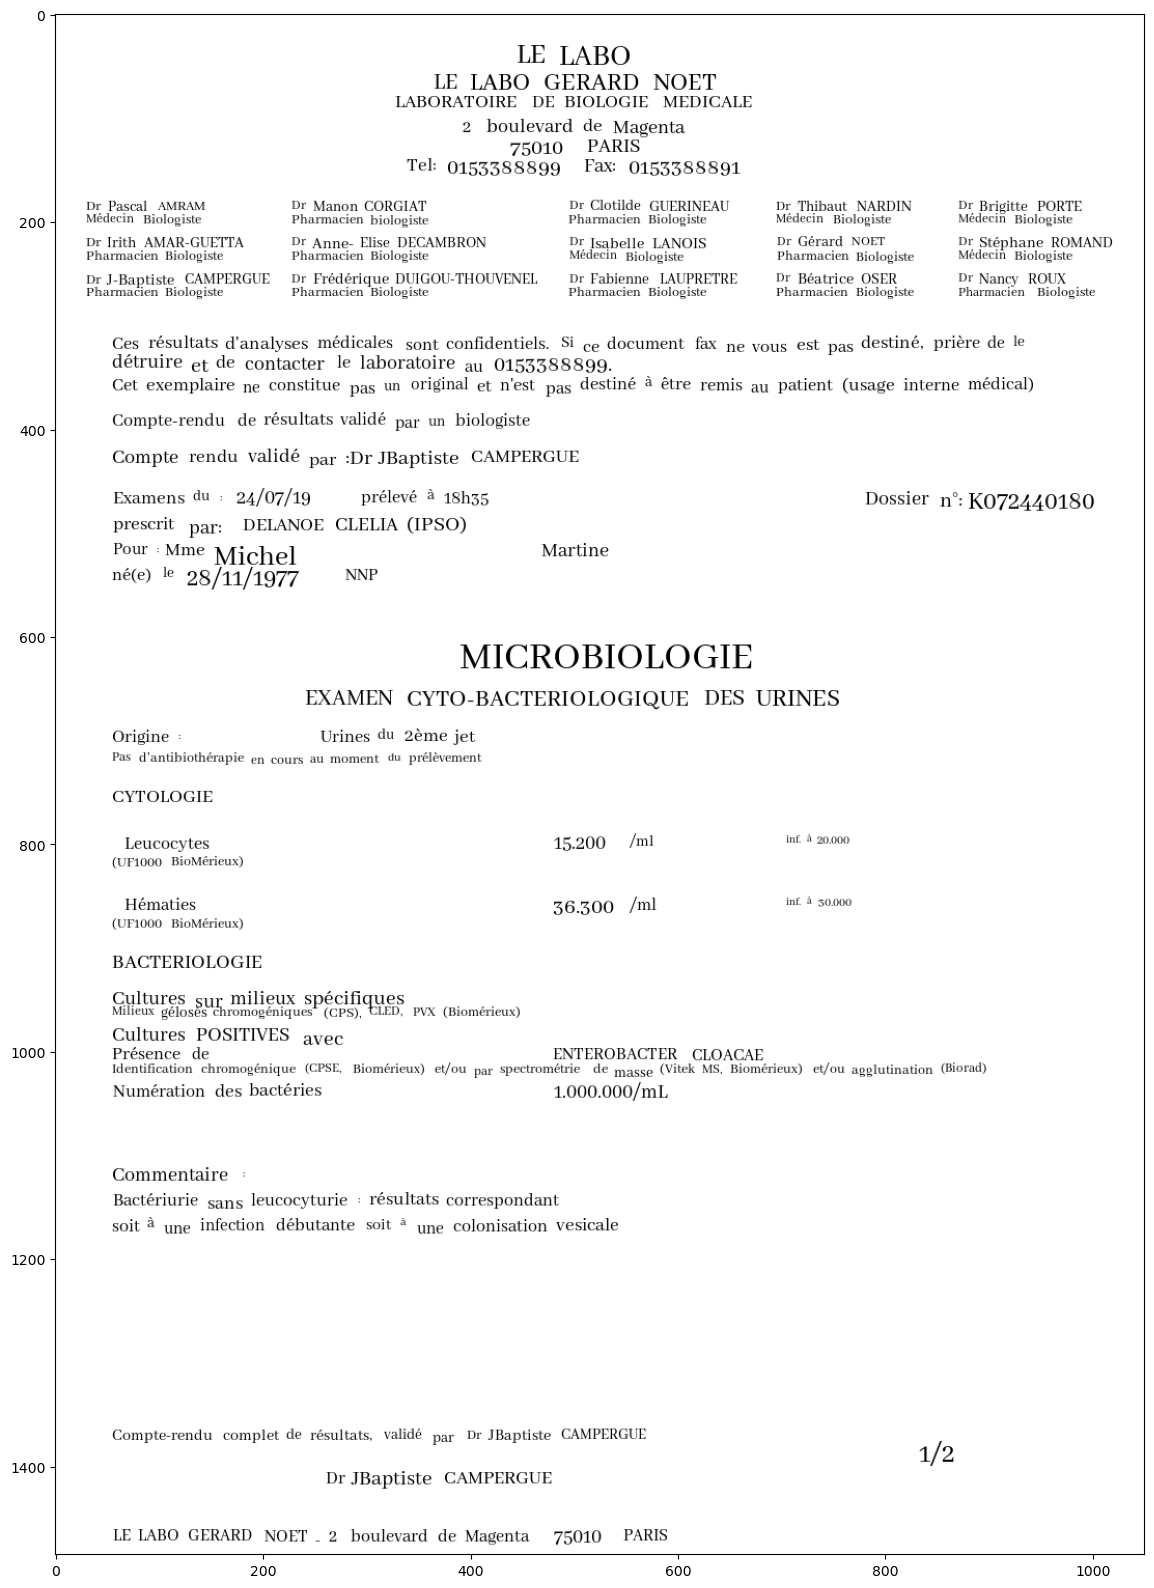

In [15]:
page_0 = datas[8]['0']
width, height = 210 *5, 297*5

####
# put the following code in an other cell to not reload full dataset each time
####
# path of .ttf
font_path = "./AbhayaLibre-Regular.ttf"


# create a new image with white background
blank_image = Image.new('RGB', (width, height), 'white')
# get a drawing context
d = ImageDraw.Draw(blank_image)
for line in page_0:
    if line['line']['confidence'] > 50:
        for word in line['line']['words']:
            (x, y, w, h) = (word['left']*width, word['top']*height, word['width']*width, word['height']*height)
            text = word["text"]
            d.text((x, y), text, font=get_font_size(text, font_path, w), fill=(0, 0, 0))

# can locally save the page with following line:
# blank_image.save("output_image.png")
plt.figure(figsize=(40,20))
plt.imshow(blank_image)
plt.savefig('test.png')

In [16]:
question = "Quelle est la valeur Leucocytes ?"
context = texts[8]
print("Question: ", question)
print("Answer: ", get_answer(question, context))

Question:  Quelle est la valeur Leucocytes ?
Answer:   15.200 /ml inf. à 20.000


In [17]:
df = pd.read_excel("ANS_JDV_CircuitBio.xlsx", sheet_name="1.JDV_CircuitBio", header=1)

Remplacer les é, è par des e

Enlever la ponctuation dans les noms

# Preprocessing

Supprimer les lignes identiques

In [18]:
df = df[['Unité recommandée', 'Unité UCUM', "Libellés d\'édition (Reférentiel JDV ANS)"]].drop_duplicates()

Supprimer les lignes où les unités sont à NaN

In [19]:
df = df[pd.notnull(df['Unité recommandée'])]

Renommer les colonnes

In [20]:
df = df.rename(columns={'Libellés d\'édition (Reférentiel JDV ANS)' : 'Nom'})

In [21]:
df

,Unité recommandée,Unité UCUM,Nom
0,10*12/L,10*12/L,Hématies
1,g/L,g/L,Hémoglobine
2,%,%,Hématocrite
3,fL,fL,VGM
4,pg,pg,TCMH
...,...,...,...
6328,ng/mL,ng/mL,Anti-Rituximab
6329,µg/mL,ug/mL,Ustekinumab
6330,ng/mL,ng/mL,Anti-Ustekinumab
6331,µg/mL,ug/mL,Védolizumab


In [22]:
a = df['Unité recommandée'] == df['Unité UCUM']
a

0        True
1        True
2        True
3        True
4        True
        ...  
6328     True
6329    False
6330     True
6331    False
6332     True
Length: 2342, dtype: bool

In [23]:
a[a == False]

62      False
64      False
83      False
85      False
171     False
        ...  
6323    False
6325    False
6327    False
6329    False
6331    False
Length: 789, dtype: bool

In [24]:
a.loc[[62]]

62    False
dtype: bool

In [25]:
df.filter(regex='.*Synonyme')

""
0
1
2
3
4
...
6328
6329
6330
6331


In [26]:
# create a dictionary with all measurements nameq and count the number of occurences
dict = {}
dict['grandeur'] = df['Nom'].value_counts().index.tolist()
dict['occurence'] = [0 for o in dict['grandeur']]

print(dict['grandeur'][0])
print(dict['occurence'][0])

Leucocytes
0


In [27]:
# create a dataframe with the dictionary
df_occ = pd.DataFrame(dict)
df_occ

,grandeur,occurence
0,Leucocytes,0
1,Hématies,0
2,Zinc,0
3,Charge virale HHV-8,0
4,Glucose,0
...,...,...
2084,2-hydroxyisocaproate/créatinine,0
2085,2-hydroxyglutarate/créatinine,0
2086,2-hydroxybutyrate/créatinine,0
2087,2-hydroxyadipate/créatinine,0


In [28]:
#create a leveishetein distance function with substitution cost = 1
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)
    if len(s2) == 0:
        return len(s1)
    
    previous_row = range(len(s2) + 1)
    
    for i, c1 in enumerate(s1):
        current_row = [i+1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j+1] + 1
            deletions = current_row[j] + 1
            
            substitutions = previous_row[j] + (c1 != c2)
            
            current_row.append(min(insertions, deletions, substitutions))
            
        previous_row = current_row
        
    return previous_row[-1]

In [29]:
# preprocess the word by removing all accent,punctuations and putting the word in lower case
from unidecode import unidecode

def preprocess(word):
    lower = str.lower(word)
    normalized = unidecode(lower)
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for ele in normalized:
        if ele in punc:
            normalized = normalized.replace(ele, "")
    return normalized

preprocess("hémora:.gie")

'hemoragie'

In [30]:
# for each document do a set of all the words
# for each word in the set. compare it to all the words in the dictionary
# if the distance is less or equal than 2, add 1 to the occurence of the word in the dictionary
from tqdm import tqdm
for i in tqdm(range(len(texts))):
    words = set(texts[i].split())
    for word in words:
        for j in range(len(df_occ)):
            if levenshtein(word, df_occ['grandeur'][j]) <= 2 and (preprocess(word) == preprocess(df_occ['grandeur'][j])):
                df_occ['occurence'][j] += 1
                
df_occ

  0%|          | 0/289 [00:00<?, ?it/s]/tmp/ipykernel_2967/1113993988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occ['occurence'][j] += 1
100%|██████████| 289/289 [1:36:56<00:00, 20.13s/it]


,grandeur,occurence
0,Leucocytes,114
1,Hématies,105
2,Zinc,0
3,Charge virale HHV-8,0
4,Glucose,3
...,...,...
2084,2-hydroxyisocaproate/créatinine,0
2085,2-hydroxyglutarate/créatinine,0
2086,2-hydroxybutyrate/créatinine,0
2087,2-hydroxyadipate/créatinine,0


In [31]:
# sort the dataframe by occurence
df_occ = df_occ.sort_values(by=['occurence'], ascending=False)
df_occ

,grandeur,occurence
0,Leucocytes,114
1,Hématies,105
211,Lymphocytes,70
1466,Hématocrite,70
1803,Hémoglobine,70
...,...,...
712,Thiopental,0
711,Alprazolam,0
710,Hydroxyalprazolam,0
709,Bromazépam,0


In [39]:
# take the first 100 most occurent words
top_120 = df_occ[:120]
top_120
# export into excel file
top_120.to_csv("top_120.csv")

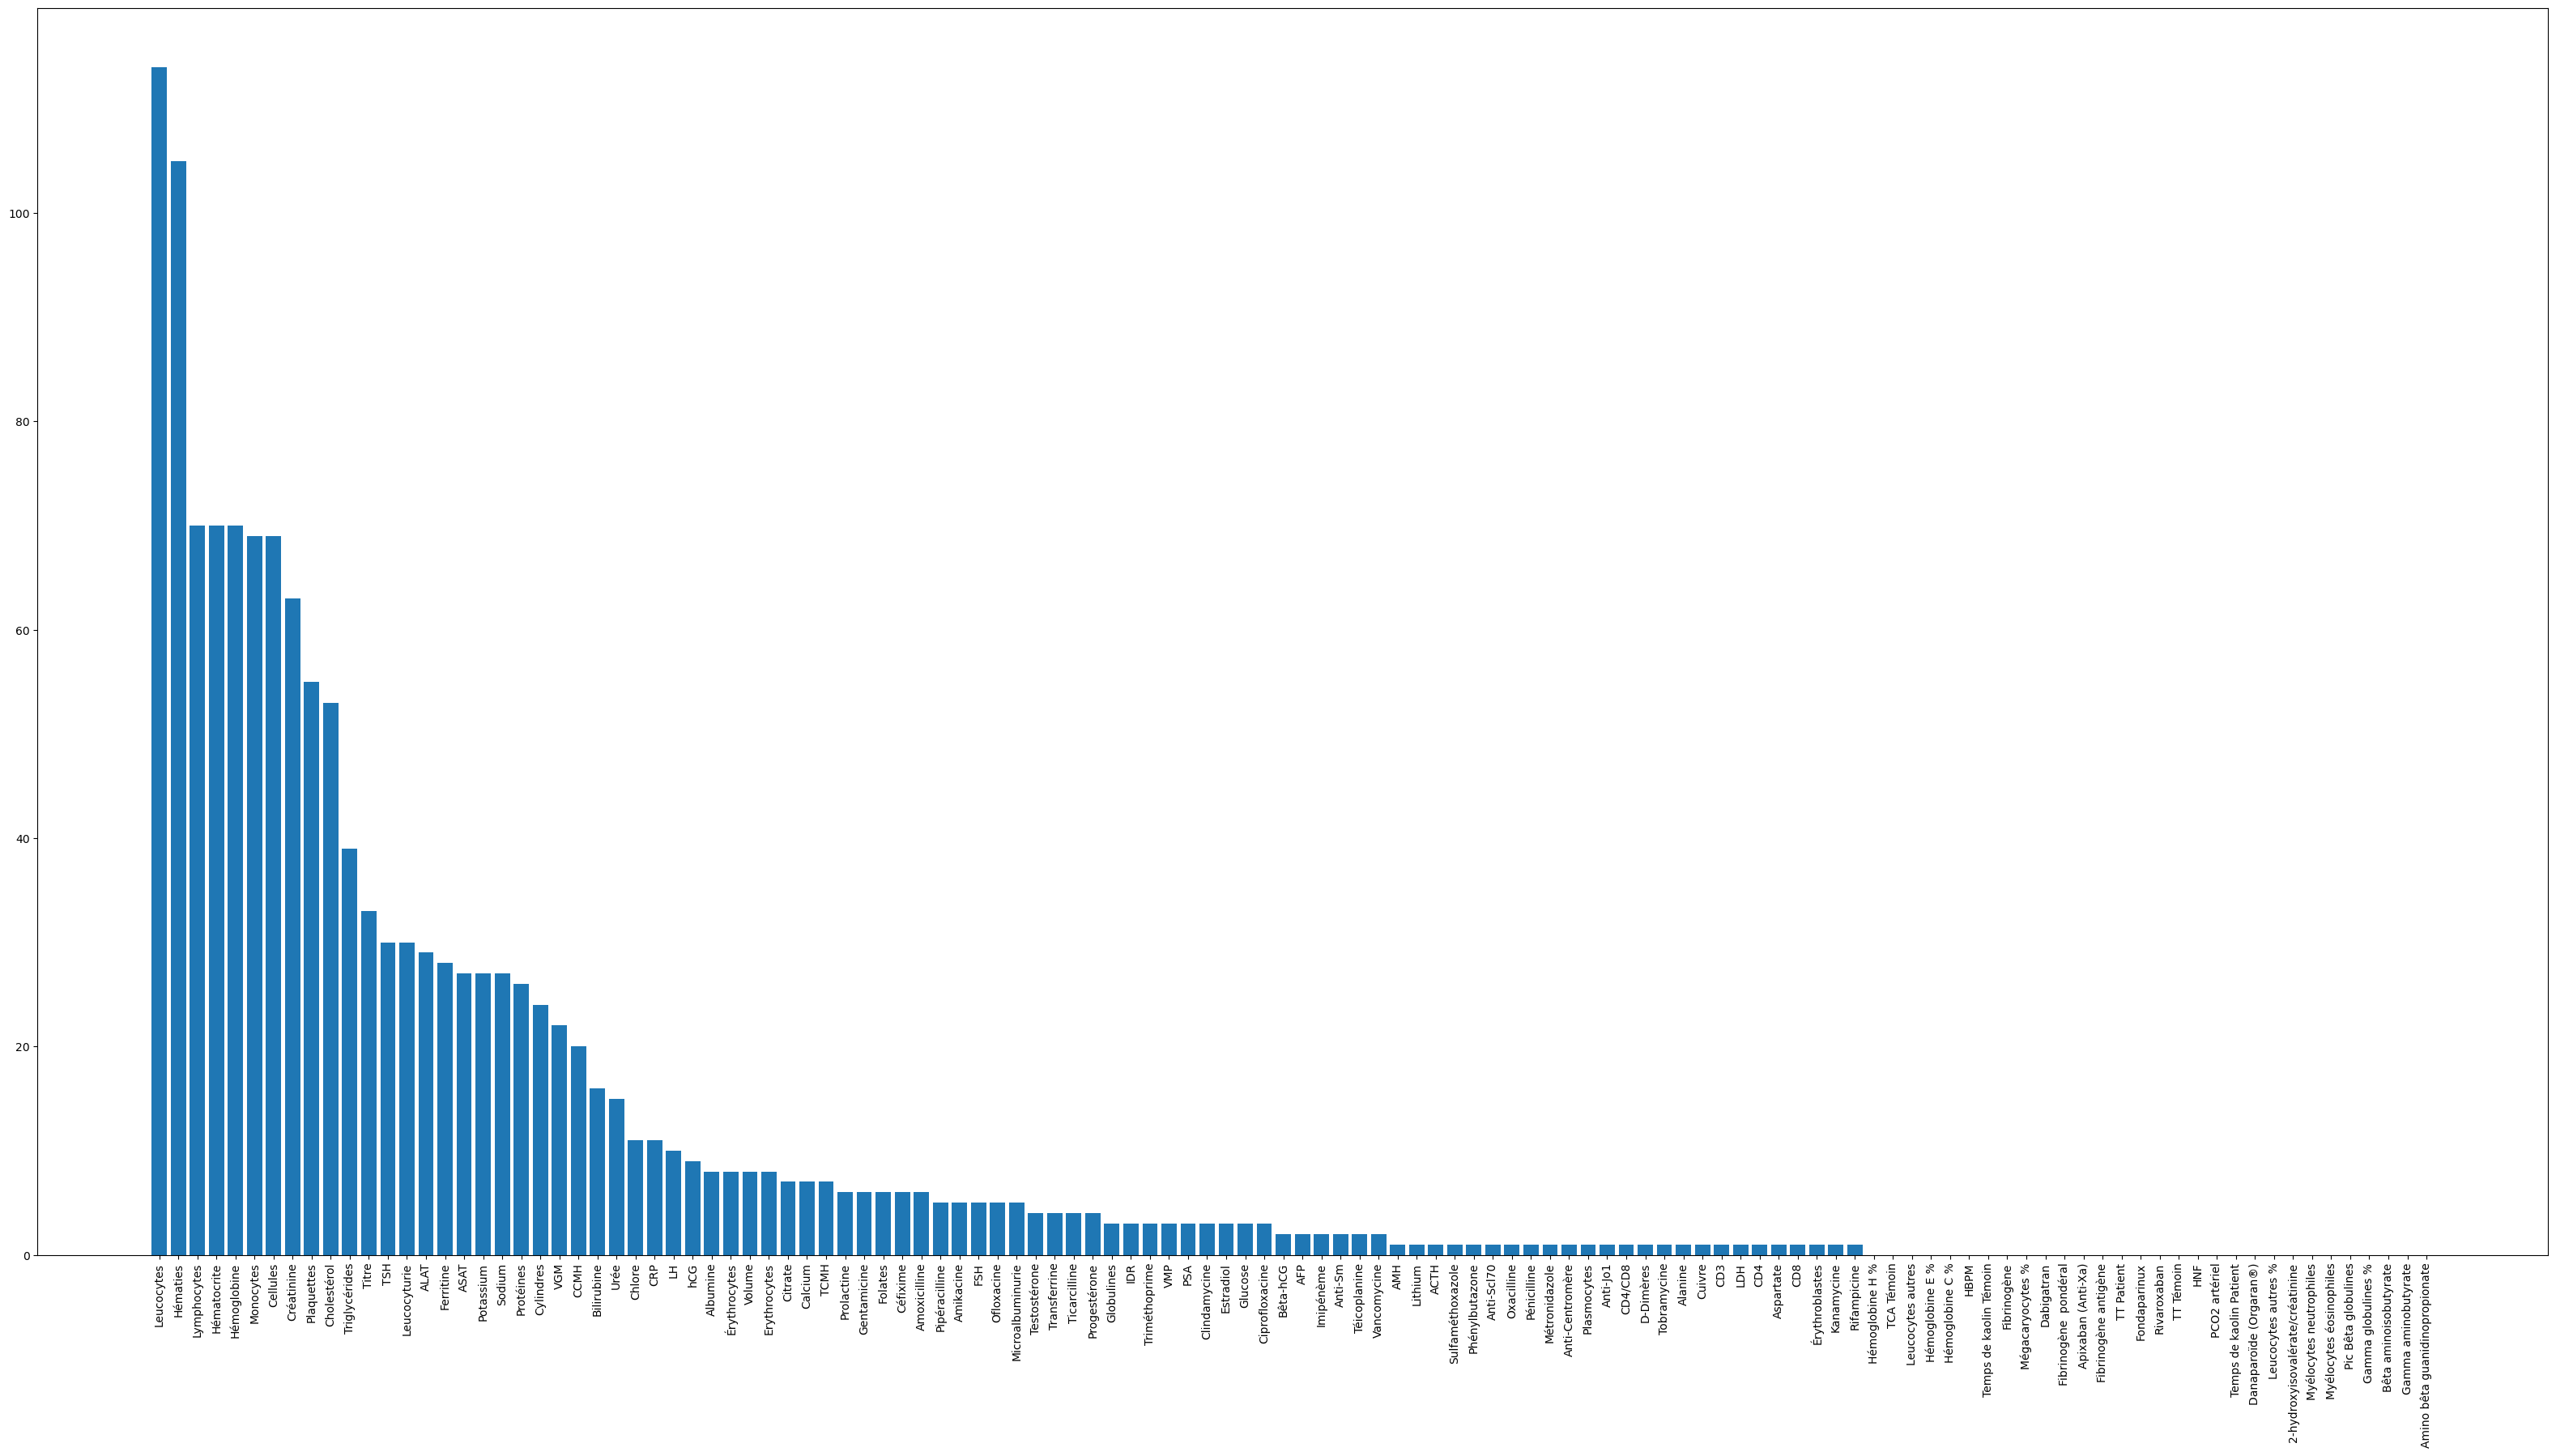

In [40]:
# make a bar plot of the 100 most occurent words
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plt.bar(top_120['grandeur'], top_120['occurence'])
plt.xticks(rotation=90)
plt.show()